# **Neural Network**

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labls),(test_img, test_labls) = mnist.load_data()
train_img, test_img = train_img/255.0, test_img/255.0
model = tf.keras.models.Sequential([
                             tf.keras.layers.Flatten(),
														 tf.keras.layers.Dense(128, activation="relu"),
														 tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
							loss="sparse_categorical_crossentropy",
							metrics=["accuracy"])
history = model.fit(train_img, train_labls, epochs=5)
test = model.evaluate(test_img, test_labls)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4925 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8659
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8841
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8745


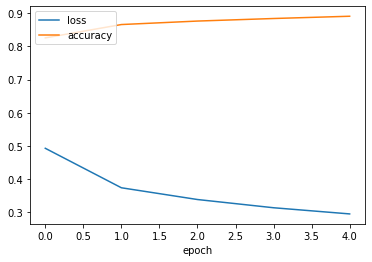

In [ ]:
#Plot loss and accuracy of a trained model
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

We got 89% on training and 87% on validation. We can use Convolutions to make our model better. 

The concept of **Convolutional Neural Networks**
* Add some layers to do convolution before you have the dense 
layers, and then the information going to the dense layers is more focussed, and possibly more accurate.
* the amount of information needed is then much less...because you'll just train on the highlighted features.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like **edge detection**. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.


In [20]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(train_img, train_labels), (test_img, test_labels) = mnist.load_data()
train_img=train_img.reshape(60000, 28, 28, 1)
train_img=train_img / 255.0
test_img = test_img.reshape(10000, 28, 28, 1)
test_img=test_img/255.0

Reshape the data. First convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. 

MaxPooling layer which is then designed to compress the image. By specifying (2,2) for the MaxPooling, the effect is 1/4 size of the image(2x2 = 4). Everytime we use MaxPooling, the image size is reduced.

# **Convolution Neural Network**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(train_img,train_labls, epochs=5)
test = model.evaluate(test_img, test_labls)
print('Train accuracy:',history.epoch, history.history['acc'][-1])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

The number of convolutions you want to generate. Purely arbitrary, 

1.   The number of convolutions that we are going to generate is starting with the order of 32
2.   The size of the convolution is 3x3 grid
3.   Thte activation function is relu, which returning x when x>0, else returning 0


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape =(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_img, train_labls, epochs=5)
test_loss, test_acc = model.evaluate(test_img, test_labls)
print('Train accuracy:',history.epoch, history.history['acc'][-1])
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.4507 - accuracy: 0.8356
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.3035 - accuracy: 0.8891
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2578 - accuracy: 0.9058
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2237 - accuracy: 0.9169
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.2523 - accuracy: 0.9112
0.9111999869346619


# **Visualization the Convolutions and Pooling**

In [ ]:
#first 100 labels
print(test_labls[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


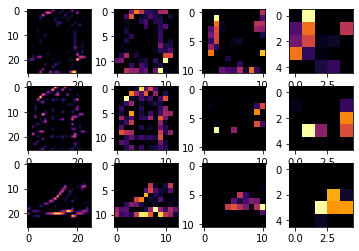

In [ ]:
import matplotlib.pyplot as plt
f,axe = plt.subplots(3,4)
first_img = 4
second_img = 7
third_image = 0
convolution_number = 1
layer_outputs = [layer.output for layer in model.layers]
activation = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)
for x in range(0,4):
  f1 = activation.predict(test_imag[first_img].reshape(1, 28, 28, 1))[x]
  axe[0,x].imshow(f1[0, : , :, convolution_number], cmap='inferno')
  axe[0,x].grid(False)
  f2 = activation.predict(test_imag[second_img].reshape(1, 28, 28, 1))[x]
  axe[1,x].imshow(f2[0, : , :, convolution_number], cmap='inferno')
  axe[1,x].grid(False)
  f3 = activation.predict(test_imag[third_image].reshape(1, 28, 28, 1))[x]
  axe[2,x].imshow(f3[0, : , :, convolution_number], cmap='inferno')
  axe[2,x].grid(False)


# **EXERCISES**
1.   Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.
2.   Remove the final Convolution. What impact will this have on accuracy or training time?
3.   How about adding more Convolutions? What impact do you think this will have? Experiment with it.
4.   Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape =(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_img, train_labls, epochs=10)
test_loss, test_acc = model.evaluate(test_img, test_labls)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3853 - accuracy: 0.8621
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2605 - accuracy: 0.9064
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2181 - accuracy: 0.9199
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1861 - accuracy: 0.9314
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1590 - accuracy: 0.9407
Epoch 6/10
1125/1875 [=================>............] - ETA: 15s - loss: 0.1330 - accuracy: 0.9500

KeyboardInterrupt: ignored